In [1]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import matplotlib.pyplot as plt
from data_preprocessing import  load_data

In [2]:
df = load_data('../Data/Online_Retail_Clustered.csv',with_cluster=True)

Loading data from ../Data/Online_Retail_Clustered.csv with cluster=True
Data loaded successfully as clustered
Data shape: (318025, 14)


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2024-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2024,12,1,8,Regular Shoppers
1,536365,71053,WHITE METAL LANTERN,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2024,12,1,8,Regular Shoppers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2024-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2024,12,1,8,Regular Shoppers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2024,12,1,8,Regular Shoppers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2024-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2024,12,1,8,Regular Shoppers


In [4]:
cluster_summary = df.groupby('cluster').agg({
    'InvoiceNo': 'count',        # Frequency (number of records)
    'TotalPrice': 'sum',         # Total sales
    'Quantity': 'sum'            # Total quantities
}).rename(columns={'InvoiceNo': 'Frequency'}).sort_index()

In [5]:
cluster_summary['Avg price per transaction'] = cluster_summary['TotalPrice'] / cluster_summary['Frequency']
cluster_summary['Avg quantity per transaction'] = cluster_summary['Quantity'] / cluster_summary['Frequency']
cluster_summary['Avg price per item'] = cluster_summary['TotalPrice'] / cluster_summary['Quantity']


In [6]:
cluster_summary

,Frequency,TotalPrice,Quantity,Avg price per transaction,Avg quantity per transaction,Avg price per item
cluster,,,,,,
Budget Shoppers,78203,237378.344,214534,3.035412,2.743296,1.106484
Core Shoppers,85697,1309087.280,979190,15.275766,11.426188,1.336908
Premium Shoppers,51528,880135.880,203430,17.080730,3.947951,4.326480
Regular Shoppers,68844,703218.220,268520,10.214662,3.900413,2.618867
WholeSale Buyers,33753,798080.460,792279,23.644727,23.472847,1.007322


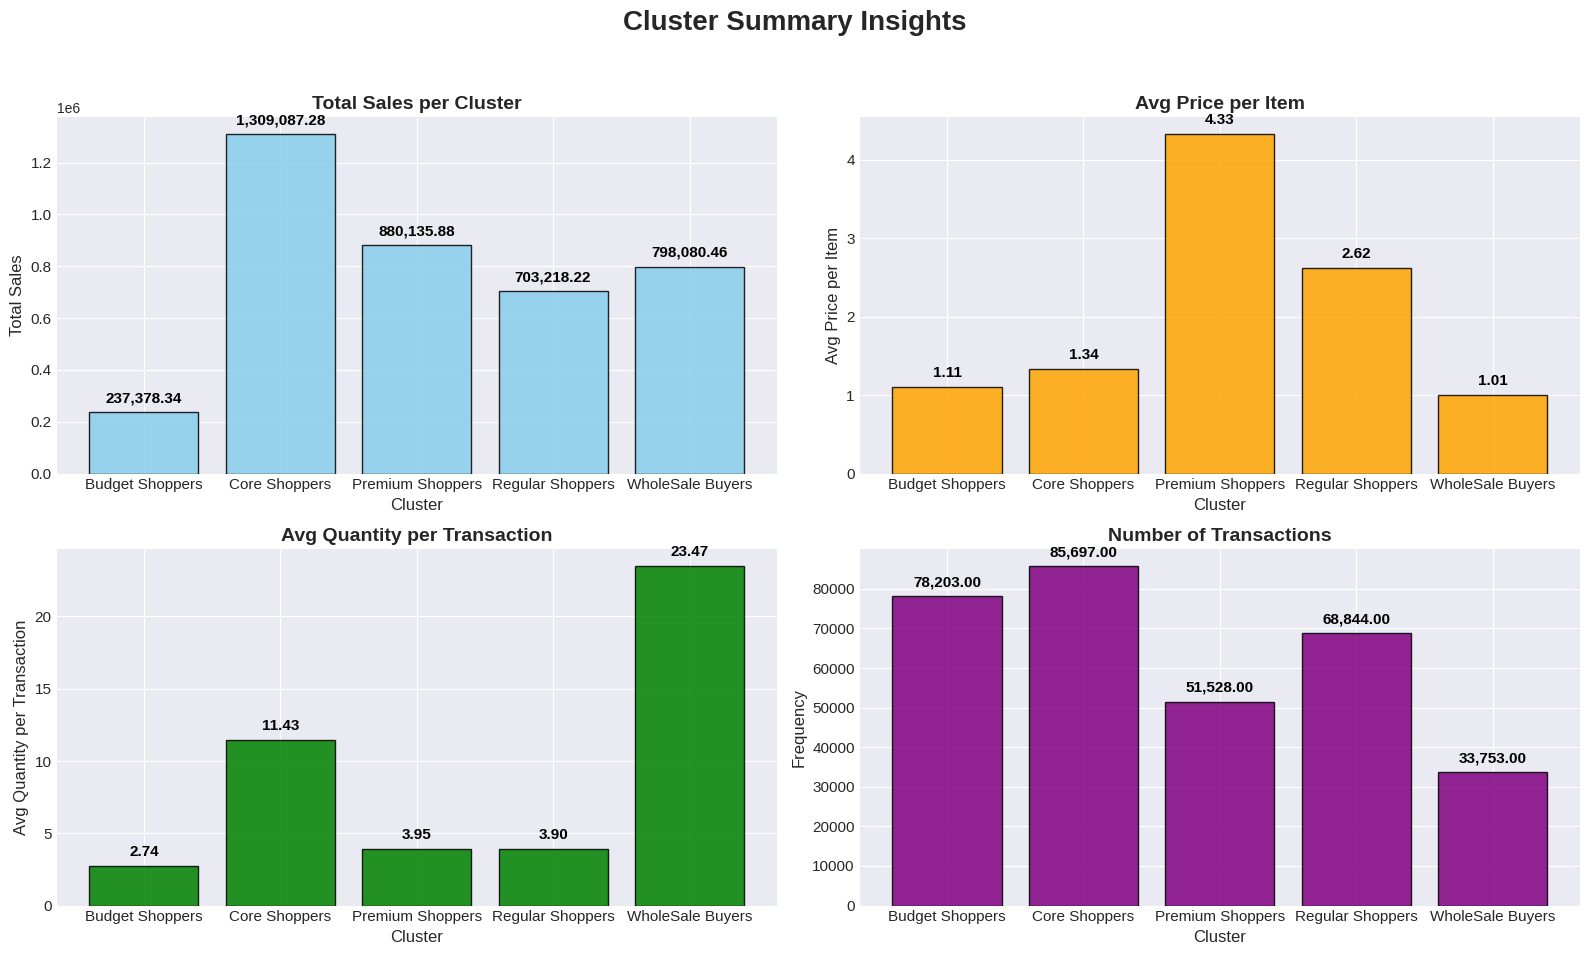

In [7]:

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Cluster Summary Insights', fontsize=20, fontweight='bold')

bar_configs = [
    ('TotalPrice', 'Total Sales per Cluster', 'Total Sales', 'skyblue'),
    ('Avg price per item', 'Avg Price per Item', 'Avg Price per Item', 'orange'),
    ('Avg quantity per transaction', 'Avg Quantity per Transaction', 'Avg Quantity per Transaction', 'green'),
    ('Frequency', 'Number of Transactions', 'Frequency', 'purple')
]

for ax, (col, title, ylabel, color) in zip(axes.flatten(), bar_configs):
    bars = ax.bar(cluster_summary.index, cluster_summary[col], color=color, edgecolor='black', alpha=0.85)
    ax.set_title(title, fontsize=14, fontweight='semibold')
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', labelsize=11)
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Cluster Descriptions

---

## Regular Shoppers (Cluster 0)


**Description:**  
A large segment of frequent shoppers purchasing moderately priced items in small quantities per transaction. They contribute steadily to sales with consistent, medium-sized purchases.

**Business Insight:**  
Encourage upselling through bundles or loyalty programs to increase transaction value.

---

## Premium Shoppers (Cluster 1)



**Description:**  
A selective segment making fewer transactions with high-value, premium-priced items. They buy expensive products in small quantities.

**Business Insight:**  
Target with premium product campaigns to increase transaction frequency.

---

## Wholesale Buyers (Cluster 2)


**Description:**  
A niche segment with infrequent, high-volume purchases of low-cost items, likely wholesalers or businesses.

**Business Insight:**  
Offer bulk discounts or B2B programs to encourage more frequent purchases.

---

## Core Shoppers (Cluster 3)



**Description:**  
The dominant segment with frequent, high-volume purchases of moderately priced items, driving the majority of sales and quantity.

**Business Insight:**  
Prioritize retention and upselling, as they are the core revenue drivers.

---

## Budget Shoppers (Cluster 4)



**Description:**  
A large segment of frequent shoppers purchasing small quantities of low-cost items, likely bargain seekers.

**Business Insight:**  
Use promotions to maintain high frequency, and explore low-cost add-ons for upselling.

---

# Key Insights

### Avg Price per Item: Highlights product value differences

- **Premium Shoppers ($4.33/item):** Buy the most expensive items.
- **Wholesale Buyers ($1.01/item)** and **Budget Shoppers ($1.11/item):** Focus on low-cost items.
- **Core Shoppers ($1.34/item)** and **Regular Shoppers ($2.62/item):** Buy moderately priced items.

### Quantity per Transaction: Distinguishes purchasing volume

- **Wholesale Buyers (23.47 items/transaction)** and **Core Shoppers (11.43 items/transaction):** Buy in large quantities.
- **Regular, Premium, and Budget Shoppers:** Buy ~2.7–3.95 items per transaction.

### Business Implications

- **Core Shoppers** are the primary revenue and volume drivers.
- **Wholesale Buyers** are high-volume but infrequent, suggesting potential for B2B growth.
- **Premium Shoppers** offer high margins but need more frequent engagement.

---




# RFM Over Time For each cluster

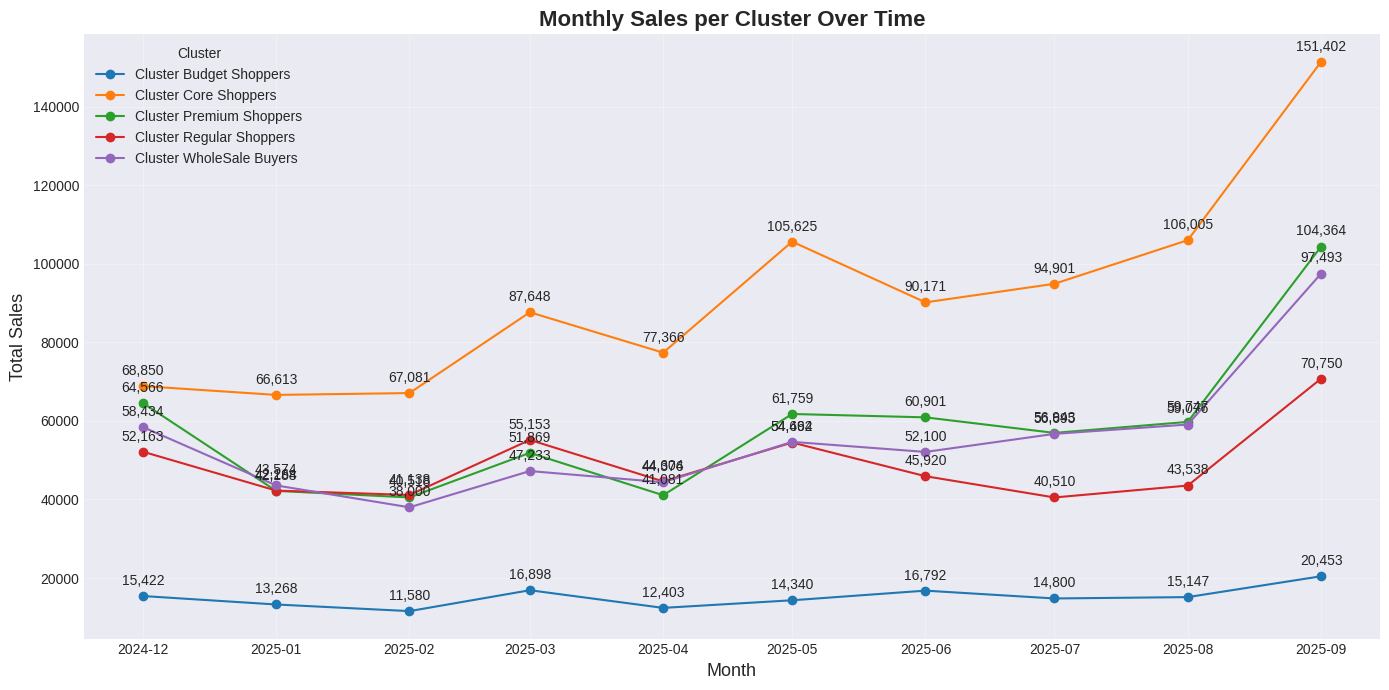

In [8]:
# Aggregate monthly sales per cluster
monthly_sales = (
    df.groupby(['Year', 'Month', 'cluster'])['TotalPrice']
    .sum()
    .rename('TotalSales')
    .reset_index()
)

# Filter for months from 2024-12 to 2025-09
mask = (
    (monthly_sales['Year'] == 2024) & (monthly_sales['Month'] >= 12)
) | (
    (monthly_sales['Year'] == 2025) & (monthly_sales['Month'] <= 9)
)
filtered_monthly_sales = monthly_sales[mask]

plt.figure(figsize=(14, 7))
for cluster in sorted(df['cluster'].unique()):
    cluster_data = filtered_monthly_sales[filtered_monthly_sales['cluster'] == cluster]
    x = pd.to_datetime(cluster_data[['Year', 'Month']].assign(DAY=1))
    y = cluster_data['TotalSales']
    plt.plot(x, y, marker='o', label=f'Cluster {cluster}')
    for xi, yi in zip(x, y):
        plt.annotate(f'{yi:,.0f}', (xi, yi), textcoords="offset points", xytext=(0,8), ha='center', fontsize=10)

plt.title('Monthly Sales per Cluster Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


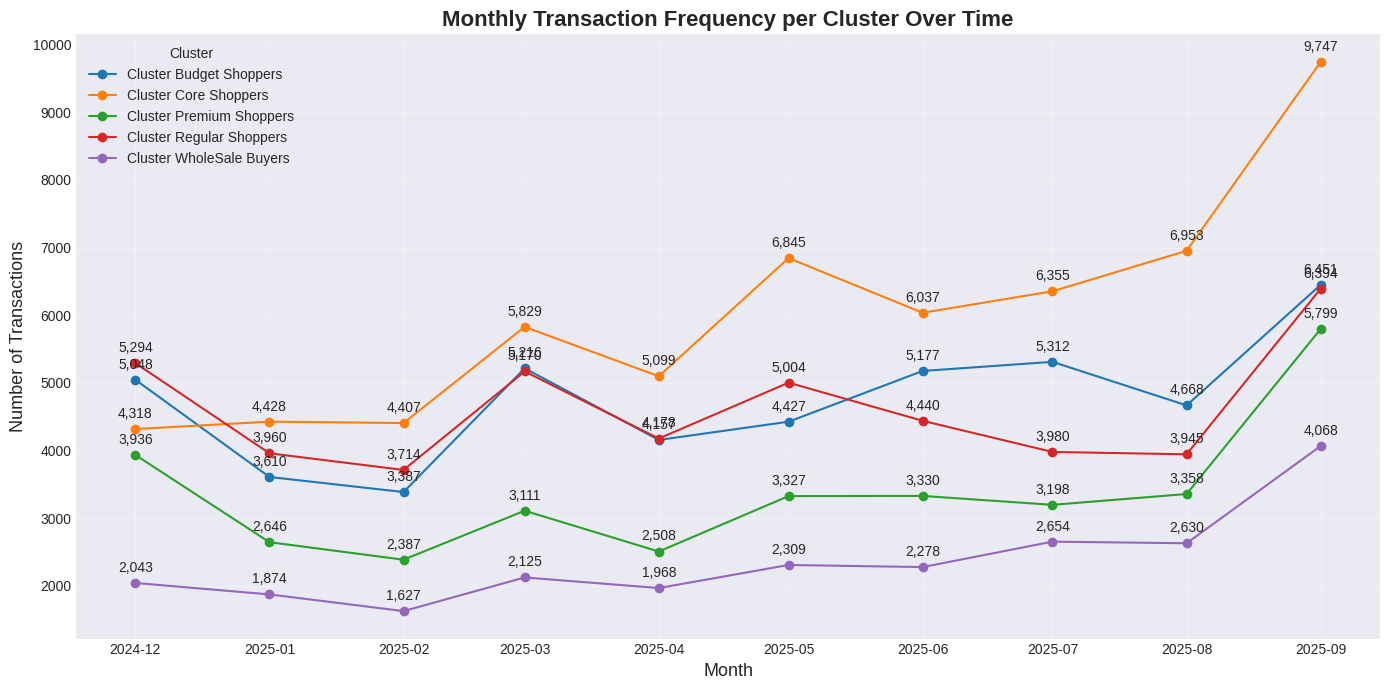

In [9]:

monthly_freq = (
    df.groupby(['Year', 'Month', 'cluster'])['InvoiceNo']
    .count()
    .rename('Frequency')
    .reset_index()
)
mask = (
    (monthly_freq['Year'] == 2024) & (monthly_freq['Month'] >= 12)
) | (
    (monthly_freq['Year'] == 2025) & (monthly_freq['Month'] <= 9)
)
filtered_freq = monthly_freq[mask]

plt.figure(figsize=(14, 7))
for cluster in sorted(df['cluster'].unique()):
    cluster_data = filtered_freq[filtered_freq['cluster'] == cluster]
    x = pd.to_datetime(cluster_data[['Year', 'Month']].assign(DAY=1))
    y = cluster_data['Frequency']
    plt.plot(x, y, marker='o', label=f'Cluster {cluster}')
    for xi, yi in zip(x, y):
        plt.annotate(f'{yi:,}', (xi, yi), textcoords="offset points", xytext=(0,8), ha='center', fontsize=10)

plt.title('Monthly Transaction Frequency per Cluster Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Transactions', fontsize=13)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Monthly Transaction Frequency Analysis
Below, we analyze monthly sales and transaction frequency for each customer cluster from December 2024 to September 2025. The data highlights trends, growth rates, and key inflection points for each segment.

---

### Cluster Trends (Dec 2024 – Sep 2025)

| Cluster             | Dec 2024 Sales | Sep 2025 Sales | % Growth | Dec 2024 Freq | Sep 2025 Freq | % Growth | Notable Lows/Highs                | Key Insight                                  |
|---------------------|:--------------:|:--------------:|:--------:|:-------------:|:-------------:|:--------:|:-----------------------------------|:---------------------------------------------|
| **Core Shoppers**   | $68,850        | $151,402       | +120%    | 4,318         | 9,747         | +126%    | Dip: $77,366 (Apr), 5,099 (Apr)    | Leads in revenue and activity, strong growth |
| **Premium Shoppers**| $64,566        | $104,364       | +62%     | 3,936         | 5,799         | +47%     | Low: $40,518 (Feb), 2,387 (Feb)    | Late surge, premium demand                   |
| **Wholesale Buyers**| $58,434        | $97,493        | +67%     | 2,043         | 4,068         | +99%     | Low: $38,000 (Feb), 1,627 (Feb)    | Stable, low-frequency bulk purchases         |
| **Regular Shoppers**| $52,163        | $70,750        | +36%     | 5,294         | 6,394         | +21%     | Low: $40,510 (Jul), 3,945 (Aug)    | Steady, moderate growth                      |
| **Budget Shoppers** | $15,422        | $20,453        | +33%     | 5,048         | 6,451         | +28%     | Low: $11,580 (Feb), 3,387 (Feb)    | Gradual growth, low-value focus              |

---

#### Patterns & Insights

- **April 2025 Dip:** Core Shoppers’ sales and frequency drop sharply, suggesting an external impact (e.g., seasonality, holidays).
- **September 2025 Surge:** Core and Premium Shoppers reach peak sales and frequency, indicating a strong seasonal effect.
- **Wholesale Buyers:** Consistent but low-frequency, high-value transactions—potential for B2B targeting.
- **Budget Shoppers:** Small but steady growth, focus on low-cost items.

---

#### Strategic Recommendations

- **Core Shoppers:** Retain and grow with loyalty programs and upselling.
- **Premium Shoppers:** Promote premium products, especially before peak months.
- **Wholesale Buyers:** Offer quarterly incentives and bulk discounts.
- **Budget Shoppers:** Introduce low-cost add-ons and maintain engagement with promotions.
- **All Segments:** Monitor for seasonal dips (April) and capitalize on peaks (September).

---

#### Next Steps

- Investigate causes for April 2025 dip (holidays, economic factors).
- Analyze sales per transaction (e.g., Core Shoppers: $151,402/9,747 ≈ $15.53).
- Adjust marketing and inventory for seasonal trends.
- Track July–August trends to anticipate September demand.

---




In [ ]:
# fix the model logic
# remove some countries